In [427]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot

data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).to_numpy()

print(X_temp.shape)
print(X.shape)
print(y.shape)
X[1,:]

(28, 28, 18724)
(18724, 784)
(18724, 10)


array([0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.16078432, 0.38039216, 0.6509804 , 0.87058824,
       0.9764706 , 0.90588236, 0.6627451 , 0.4       , 0.11764706,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07450981,
       0.3647059 , 0.44313726, 0.42745098, 0.4627451 , 0.5019608 ,
       0.54509807, 0.6392157 , 0.77254903, 0.8627451 , 0.9607843 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 1.        , 0.94509804, 0.42352942, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.654902  , 1.        , 0.9843137 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99607843, 0.98039216, 0.972549  ,
       0.99215686, 1.        , 0.99607843, 0.9882353 , 0.99215

(28, 28)


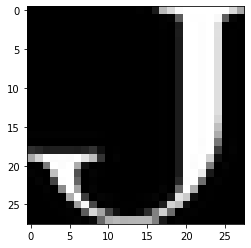

In [428]:
print(X_temp[:,:,3].shape)
plt.imshow(X_temp[:,:,3],cmap="gray");

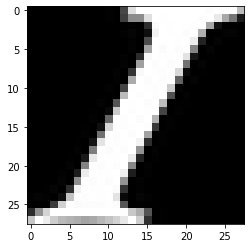

In [429]:
plt.imshow(X_temp[:,:,4504],cmap="gray");

In [430]:
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=50)
print(X_train.shape)
print(y_train.shape)

(14979, 784)
(14979, 10)


In [431]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [432]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

model.add(Dense(units=100, input_shape=[784], 
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=100, 
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=10,
                activation='sigmoid', kernel_regularizer=l2(0.001)))


# Compile model
sgd = SGD(learning_rate=0.1)

# display accuracy for each epoch
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [433]:
model.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_151 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_152 (Dense)            (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [434]:
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          epochs = 20, verbose=2, validation_data=(X_test_scaled,y_test))

Epoch 1/20
59/59 - 0s - loss: 2.4664 - acc: 0.2122 - val_loss: 2.2616 - val_acc: 0.3949
Epoch 2/20
59/59 - 0s - loss: 2.1119 - acc: 0.5179 - val_loss: 1.9308 - val_acc: 0.6240
Epoch 3/20
59/59 - 0s - loss: 1.7368 - acc: 0.6986 - val_loss: 1.5107 - val_acc: 0.7348
Epoch 4/20
59/59 - 0s - loss: 1.3306 - acc: 0.7697 - val_loss: 1.1659 - val_acc: 0.7989
Epoch 5/20
59/59 - 0s - loss: 1.0668 - acc: 0.8211 - val_loss: 0.9854 - val_acc: 0.8315
Epoch 6/20
59/59 - 0s - loss: 0.9297 - acc: 0.8446 - val_loss: 0.8915 - val_acc: 0.8481
Epoch 7/20
59/59 - 0s - loss: 0.8540 - acc: 0.8578 - val_loss: 0.8373 - val_acc: 0.8603
Epoch 8/20
59/59 - 0s - loss: 0.8078 - acc: 0.8655 - val_loss: 0.8029 - val_acc: 0.8668
Epoch 9/20
59/59 - 0s - loss: 0.7762 - acc: 0.8731 - val_loss: 0.7788 - val_acc: 0.8710
Epoch 10/20
59/59 - 0s - loss: 0.7528 - acc: 0.8763 - val_loss: 0.7612 - val_acc: 0.8756
Epoch 11/20
59/59 - 0s - loss: 0.7341 - acc: 0.8793 - val_loss: 0.7460 - val_acc: 0.8780
Epoch 12/20
59/59 - 0s - loss:

Loss after final iteration:  0.6814004778862


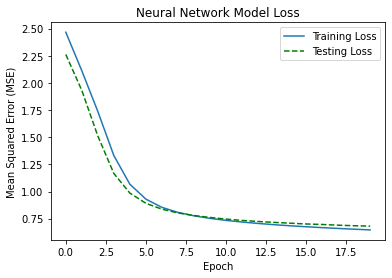

In [435]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Neural Network Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

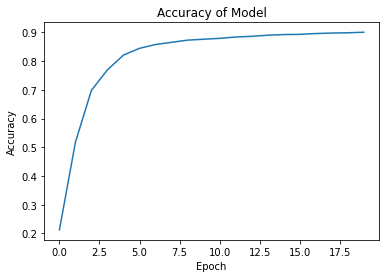

In [436]:
# plot metrics
pyplot.plot(history.history['acc'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
pyplot.show()